In [5]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

import pandas as pd

In [6]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [12]:
X = pd.DataFrame(housing.data, columns=housing.feature_names)
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [13]:
X["PRICE"] = housing.target

In [14]:
print(pd.isnull(X).any())

MedInc        False
HouseAge      False
AveRooms      False
AveBedrms     False
Population    False
AveOccup      False
Latitude      False
Longitude     False
PRICE         False
dtype: bool


c:\users\kai\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


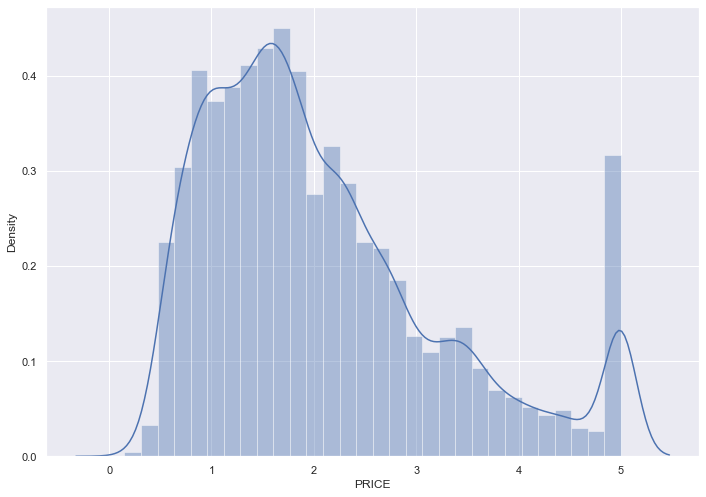

In [15]:
import matplotlib.pyplot as plt 
import seaborn as sns

# set the size of the figure
sns.set(rc={'figure.figsize':(11.7,8.27)})

# plot a histogram showing the distribution (verteilung) of the target values
sns.distplot(X['PRICE'], bins=30)
plt.show()

In [16]:
correlation_matrix = X.corr().round(2)
correlation_matrix

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
MedInc,1.00,-0.12,0.33,-0.06,0.00,0.02,-0.08,-0.02,0.69
HouseAge,-0.12,1.00,-0.15,-0.08,-0.30,0.01,0.01,-0.11,0.11
AveRooms,0.33,-0.15,1.00,0.85,-0.07,-0.00,0.11,-0.03,0.15
AveBedrms,-0.06,-0.08,0.85,1.00,-0.07,-0.01,0.07,0.01,-0.05
Population,0.00,-0.30,-0.07,-0.07,1.00,0.07,-0.11,0.10,-0.02
AveOccup,0.02,0.01,-0.00,-0.01,0.07,1.00,0.00,0.00,-0.02
Latitude,-0.08,0.01,0.11,0.07,-0.11,0.00,1.00,-0.92,-0.14
Longitude,-0.02,-0.11,-0.03,0.01,0.10,0.00,-0.92,1.00,-0.05
PRICE,0.69,0.11,0.15,-0.05,-0.02,-0.02,-0.14,-0.05,1.00


<AxesSubplot:>

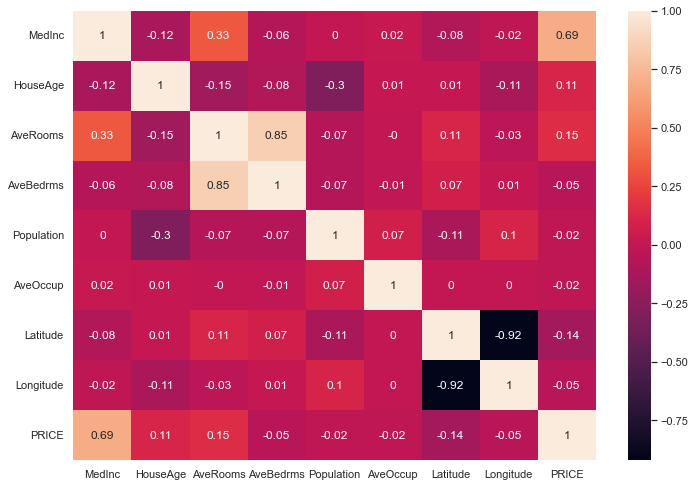

In [17]:
sns.heatmap(data=correlation_matrix, annot=True)

In [49]:
print(housing.DESCR[255:689])


        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude


In [29]:
#Correlation with output variable
cor_target = abs(correlation_matrix["PRICE"]) #Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features.drop("PRICE", inplace=True) # 1.00
relevant_features

MedInc    0.69
Name: PRICE, dtype: float64

In [33]:
y = X["PRICE"]        
X.drop("PRICE", 1, inplace=True) # 1 = on y axis

C:\Users\kai\AppData\Local\Temp/ipykernel_30996/871978530.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X.drop("PRICE", 1, inplace=True)


In [35]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [36]:
LinearRegression()

LinearRegression()

In [37]:
pred = model.predict(X)

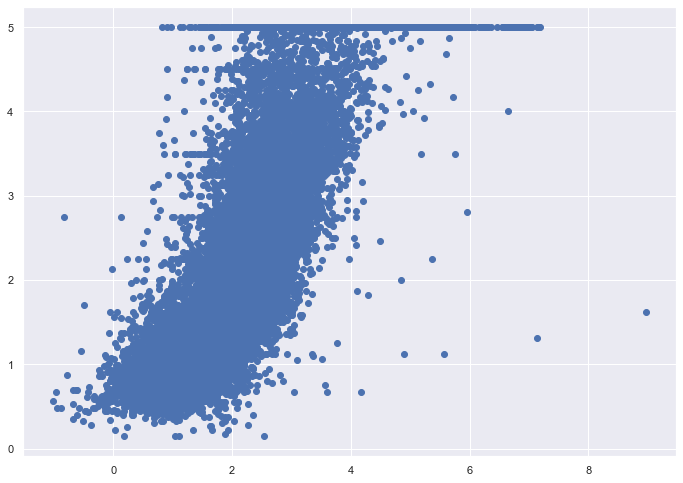

In [38]:
plt.scatter(pred, y)